In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

# Random Forest with Dinucleotidic Frequencies

## Load Data

In [9]:
# Read Data from CSV (NEW DATA, NOT SCALED)
df = pd.read_csv("../data/abnormal_writeout_noscale.data.csv", index_col=0)

# trascurare da ACC a UVM
start_drop = df.columns.get_loc("ACC")
end_drop = df.columns.get_loc("UVM")
cols = np.arange(start_drop, end_drop + 1)
df.drop(df.columns[cols], axis=1, inplace=True)

# Drop some specific columns
df.drop("oldest_phylostratum_factor", axis=1, inplace=True)
df.drop("gc_cds", axis=1, inplace=True) # ! New

# Drop Trinucleotidic frequencies
tnf_cols = [col for col in df.columns if 'freq' in col]
df.drop(columns=tnf_cols, inplace=True)
df.sort_index(inplace=True)

# Add Dinucleotidic Frequencies
dnf_df = pd.read_csv("../data/do_dinuc.freq.csv", index_col=0)
dnf_df.drop(columns=["TT_freq"], inplace=True)
dnf_df.sort_index(inplace=True)

# Concatenate the two
df = pd.concat([df, dnf_df], axis=1)

# Drop NaNs
df.dropna(inplace=True)

# Sort features
resp = df["response"]
occ = df["occ_total_sum"]
age = df["oldest_phylostratum"]
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

# Collect Features and Labels
features_df = pd.DataFrame()
features_df["occ_total_sum"] = occ
features_df["oldest_phylostratum"] = age
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df

,occ_total_sum,oldest_phylostratum,cds_length,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AA_freq,AC_freq,AG_freq,AT_freq,CA_freq,CC_freq,CG_freq,CT_freq,GA_freq,GC_freq,GG_freq,GT_freq,TA_freq,TC_freq,TG_freq
1,33,12.0,1488,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.00000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.000000,0.000000,0.023649,0.056757,0.068243,0.020270,0.064189,0.112838,0.072973,0.083108,0.070270,0.112838,0.097297,0.043919,0.009459,0.050000,0.087838
2,146,1.0,4458,0.078873,0.102737,0.062232,0.044700,0.011273,0.075146,0.04105,0.019291,1.0,0.017161,0.771801,1.299989,5.142564,0.006445,0.000000,0.521644,0.078037,0.060620,0.079394,0.054286,0.087311,0.071703,0.017417,0.079394,0.071929,0.052251,0.057453,0.052251,0.033703,0.070346,0.082334
9,21,1.0,1932,0.086458,0.030538,0.184132,0.102089,0.032614,0.000000,0.00000,0.000000,1.0,0.001798,1.000697,1.364652,0.764511,0.016101,0.000000,2.043350,0.084025,0.055498,0.072095,0.081950,0.073133,0.046162,0.010373,0.071577,0.082469,0.034232,0.059647,0.042531,0.052386,0.065353,0.078320
10,28,1.0,873,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.000000,2.043350,0.090596,0.059633,0.068807,0.076835,0.074541,0.049312,0.011468,0.069954,0.077982,0.034404,0.065367,0.038991,0.051606,0.061927,0.072248
12,58,1.0,2205,0.332885,0.356916,0.376985,0.073697,0.697306,0.180499,0.00000,0.030385,1.0,-0.029550,1.068194,1.254030,0.256175,0.013189,0.000000,3.405190,0.057832,0.063297,0.084699,0.044627,0.083333,0.084244,0.023224,0.092896,0.082878,0.061931,0.066029,0.035974,0.025046,0.073770,0.075137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100996331,1,1.0,3270,0.017151,0.000000,0.008183,0.048255,0.003405,0.000000,0.00000,0.000000,0.0,-0.008014,0.127212,0.004695,0.294549,0.028886,0.000000,0.386954,0.140394,0.059729,0.085591,0.069581,0.074507,0.032635,0.015394,0.067118,0.093596,0.050493,0.049261,0.039409,0.044335,0.046182,0.086207
100996485,0,16.0,438,0.429353,0.287671,0.691732,0.754301,0.378798,1.000000,1.00000,1.000000,0.0,0.008953,1.335430,1.488276,1.884084,0.004910,0.000000,1.316220,0.066667,0.071264,0.080460,0.048276,0.103448,0.071264,0.022989,0.066667,0.068966,0.089655,0.080460,0.036782,0.027586,0.032184,0.091954
100996939,3,1.0,345,0.452904,0.550725,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,0.034535,0.676780,0.320845,174.890614,0.000000,0.000000,1.729510,0.064140,0.034985,0.084548,0.052478,0.055394,0.069971,0.093294,0.055394,0.078717,0.119534,0.075802,0.040816,0.032070,0.049563,0.067055
101055625,0,19.0,810,0.086850,0.390123,0.078842,0.014710,0.136977,0.000000,0.00000,0.191358,0.0,-0.009772,0.775562,0.893540,1.160368,0.016984,0.000000,1.193670,0.070807,0.045963,0.065839,0.052174,0.068323,0.085714,0.058385,0.075776,0.070807,0.088199,0.081988,0.028571,0.026087,0.068323,0.062112


***
### Custom PCA

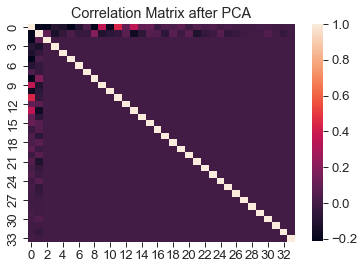

,occ_total_sum,oldest_phylostratum,cds_length,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AA_freq,AC_freq,AG_freq,AT_freq,CA_freq,CC_freq,CG_freq,CT_freq,GA_freq,GC_freq,GG_freq,GT_freq,TA_freq,TC_freq,TG_freq
1,33,12.0,1488,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.00000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.000000,0.000000,0.023649,0.056757,0.068243,0.020270,0.064189,0.112838,0.072973,0.083108,0.070270,0.112838,0.097297,0.043919,0.009459,0.050000,0.087838
2,146,1.0,4458,0.078873,0.102737,0.062232,0.044700,0.011273,0.075146,0.04105,0.019291,1.0,0.017161,0.771801,1.299989,5.142564,0.006445,0.000000,0.521644,0.078037,0.060620,0.079394,0.054286,0.087311,0.071703,0.017417,0.079394,0.071929,0.052251,0.057453,0.052251,0.033703,0.070346,0.082334
9,21,1.0,1932,0.086458,0.030538,0.184132,0.102089,0.032614,0.000000,0.00000,0.000000,1.0,0.001798,1.000697,1.364652,0.764511,0.016101,0.000000,2.043350,0.084025,0.055498,0.072095,0.081950,0.073133,0.046162,0.010373,0.071577,0.082469,0.034232,0.059647,0.042531,0.052386,0.065353,0.078320
10,28,1.0,873,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.000000,2.043350,0.090596,0.059633,0.068807,0.076835,0.074541,0.049312,0.011468,0.069954,0.077982,0.034404,0.065367,0.038991,0.051606,0.061927,0.072248
12,58,1.0,2205,0.332885,0.356916,0.376985,0.073697,0.697306,0.180499,0.00000,0.030385,1.0,-0.029550,1.068194,1.254030,0.256175,0.013189,0.000000,3.405190,0.057832,0.063297,0.084699,0.044627,0.083333,0.084244,0.023224,0.092896,0.082878,0.061931,0.066029,0.035974,0.025046,0.073770,0.075137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100996331,1,1.0,3270,0.017151,0.000000,0.008183,0.048255,0.003405,0.000000,0.00000,0.000000,0.0,-0.008014,0.127212,0.004695,0.294549,0.028886,0.000000,0.386954,0.140394,0.059729,0.085591,0.069581,0.074507,0.032635,0.015394,0.067118,0.093596,0.050493,0.049261,0.039409,0.044335,0.046182,0.086207
100996485,0,16.0,438,0.429353,0.287671,0.691732,0.754301,0.378798,1.000000,1.00000,1.000000,0.0,0.008953,1.335430,1.488276,1.884084,0.004910,0.000000,1.316220,0.066667,0.071264,0.080460,0.048276,0.103448,0.071264,0.022989,0.066667,0.068966,0.089655,0.080460,0.036782,0.027586,0.032184,0.091954
100996939,3,1.0,345,0.452904,0.550725,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,0.034535,0.676780,0.320845,174.890614,0.000000,0.000000,1.729510,0.064140,0.034985,0.084548,0.052478,0.055394,0.069971,0.093294,0.055394,0.078717,0.119534,0.075802,0.040816,0.032070,0.049563,0.067055
101055625,0,19.0,810,0.086850,0.390123,0.078842,0.014710,0.136977,0.000000,0.00000,0.191358,0.0,-0.009772,0.775562,0.893540,1.160368,0.016984,0.000000,1.193670,0.070807,0.045963,0.065839,0.052174,0.068323,0.085714,0.058385,0.075776,0.070807,0.088199,0.081988,0.028571,0.026087,0.068323,0.062112


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class ConfounderPCA(BaseEstimator, TransformerMixin):
    """ 
    Custom PCA transformer for this dataset.
    Applies PCA only to the many collinear confounder 
    variables.
    
    cols - columns to which PCA will be applied.
    
    n_components - same as with the "vanilla" PCA. 
        If 0 < n_components < 1, select the number of 
        components such that the amount of variance that 
        needs to be explained is greater than the 
        percentage specified by n_components.
        
    apply_PCA - if false, simply returns the untransformed data.
    """

    def __init__(self, cols, n_components=None, apply_PCA=True):
        self.n_components = n_components
        self.apply_PCA = apply_PCA
        self.cols = cols
        if self.apply_PCA:
            self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        if self.apply_PCA:
            self.pca.fit(X[:, self.cols])
        return self

    def transform(self, X, y=None):
        if self.apply_PCA:
            X_pca = self.pca.transform(X[:, self.cols])
            return np.c_[X[:, :2], X_pca]
        else:
            return X


sns.heatmap(pd.DataFrame(ConfounderPCA(cols=np.arange(2, X.shape[1])).fit_transform(StandardScaler().fit_transform(X))).corr())
plt.title("Correlation Matrix after PCA")
plt.show()

features_df

### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (14536, 34) (14536,)
Testing set shape: (3634, 34) (3634,)


### The Model and its Parameter Space

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier

param_grid = {
    'rf__max_depth': [None, 10, 20, 30],
    #"rf__min_samples_leaf": [1, 2, 5, 10, 20,],
    #"rf__min_samples_split": [2, 5, 10, 20],
    "pca__apply_PCA": [False, True],
    "pca__n_components": [0.01, 0.5, 0.95, None],
}

rf_clf = Pipeline([
    ('scaler', StandardScaler()),
    ("pca", ConfounderPCA(cols=np.arange(2, X.shape[1]))), 
    ("rf", BalancedRandomForestClassifier(random_state=42, max_features="sqrt", n_estimators=1000, n_jobs=2))
])

### Nested CV

In [10]:
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RepeatedKFold
from sklearn.utils._testing import ignore_warnings

# configure the cross-validation procedure
k_outer = 5
k_inner = 3
cv_outer = KFold(n_splits=k_outer, shuffle=True, random_state=1)
cv_inner = KFold(n_splits=k_inner, shuffle=True, random_state=3)

# To store results
roc_results = list()
# auprc_results = list()
# prec_results = list()
# rec_results = list()
# f1_results = list()
found_params = list()

print(f"Performing nested-cv with {k_outer} outer-folds and {k_inner} inner-folds.\n")
print("OUTER CV | BEST OF INNER CV | CHOSEN PARAMS")

for train_ix, test_ix in cv_outer.split(X_train):

    # split data
    X_tr, X_te = X_train[train_ix, :], X_train[test_ix, :]
    y_tr, y_te = y_train[train_ix], y_train[test_ix]

    # If some parameter combinations are incompatible:
    # with ignore_warnings(category=[ConvergenceWarning, FitFailedWarning]):
    
    # define search
    search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring="roc_auc", cv=cv_inner, n_jobs=-1)
    # execute search
    result = search.fit(X_tr, y_tr)
        
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_

    # evaluate model on the hold out dataset
    # yhat = best_model.predict(X_te)
    yhat = best_model.predict_log_proba(X_te)[:,1]

    # evaluate the model
    roc_auc = roc_auc_score(y_te, yhat)
    
    # store the result
    roc_results.append(roc_auc)
    # auprc_results.append(auprc(y_te, yhat))
    # prec_results.append(precision_score(y_te, yhat))
    # rec_results.append(recall_score(y_te, yhat))
    # f1_results.append(f1_score(y_te, yhat))
    found_params.append(result.best_params_)

    # report progress
    print(">roc-auc=%.3f, est=%.3f, params=%s" % (roc_auc, result.best_score_, result.best_params_))

# summarize the estimated performance of the model
print("ROC-AUC: %.3f (std = %.3f)" % (np.mean(roc_results), np.std(roc_results)))

Performing nested-cv with 5 outer-folds and 3 inner-folds.

OUTER CV | BEST OF INNER CV | CHOSEN PARAMS


KeyboardInterrupt: 

## Search, Train, and Score on Test Set

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the grid search object
gscv = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring="roc_auc", 
)

# Search
gscv_result = gscv.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [14]:
model = gscv_result.best_estimator_
print("Best Params:")
print(gscv_result.best_params_)
model.fit(X_train, y_train)

Best Params:
{'pca__apply_PCA': False, 'pca__n_components': 0.01, 'rf__max_depth': 30}


Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ConfounderPCA(apply_PCA=False,
                               cols=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
                               n_components=0.01)),
                ('rf',
                 BalancedRandomForestClassifier(max_depth=30,
                                                max_features='sqrt',
                                                n_estimators=1000, n_jobs=2,
                                                random_state=42))])

In [15]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72      2808
           1       0.33      0.64      0.44       826

    accuracy                           0.63      3634
   macro avg       0.59      0.63      0.58      3634
weighted avg       0.74      0.63      0.66      3634



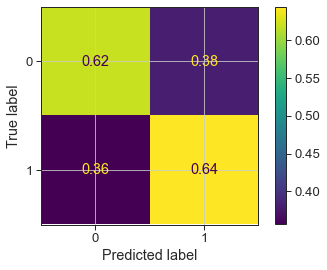

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_proba))

0.68890876465029
